# Machine Learning Algorithms
We will train and test our dataset on 5 differnt algorithms-

1. Naive-Bayes Classifier
2. Random Forest
3. Linear SVM
4. MLP Classifier
5. Logistic REgression


## Importing libraries

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

In [76]:
# Reading the preprocessed data

data=pd.read_csv('data_preprocessed.csv')

In [48]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Post ID', 'Title', 'Url', 'Author',
       'Score', 'Publish Date', 'Total No. of Comments', 'Permalink', 'Flair',
       'Over 18', 'Selftext', 'Comments', 'Title+Selftext',
       'Title_preprocessed_no_token'],
      dtype='object')

In [49]:
y.value_counts()

Politics              8425
Non-Political         6988
Coronavirus           6228
AskIndia              4328
Policy/Economy        1270
Science/Technology    1202
Business/Finance      1080
CAA-NRC               1070
Name: Flair, dtype: int64

In [50]:
flairs=['Politics','Non-Political','Coronavirus','AskIndia','Policy/Economy','Science/Technology','Business/Finance','CAA-NRC']

In [75]:
data['Selftext']=data['Selftext'].fillna(' ')
data['Selftext'].replace({'[removed]':' ','[deleted]':''},inplace=True)
data['Comments']=data['Comments'].fillna(' ')
data['Comments'].replace({'[removed]':' ','[deleted]':''},inplace=True)
data['Permalink']=data['Permalink'].fillna(' ')
data['Permalink'].replace({'[removed]':' ','[deleted]':''},inplace=True)
data['Title_preprocessed_no_token']=data['Title_preprocessed_no_token'].fillna(' ')
data['Title_preprocessed_no_token'].replace({'[removed]':' ','[deleted]':''},inplace=True)

## Defining models

In [52]:
# Naive Bayes Classifer

from sklearn.naive_bayes import MultinomialNB
def nb_classifier(X_train, X_test, y_train, y_test):
  
  
    nb = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('clf', MultinomialNB()),
                ])
    nb.fit(X_train, y_train)

    y_pred = nb.predict(X_test)

    return accuracy_score(y_pred, y_test), classification_report(y_test, y_pred,target_names=flairs)


In [53]:
# Linear SVM

from sklearn.linear_model import SGDClassifier
def linear_svm(X_train, X_test, y_train, y_test):
  
  

    sgd = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
                 ])
    sgd.fit(X_train, y_train)

    y_pred = sgd.predict(X_test)

    return accuracy_score(y_pred, y_test),classification_report(y_test, y_pred,target_names=flairs)


In [54]:
# Logistic Regrassion

from sklearn.linear_model import LogisticRegression
def logisticreg(X_train, X_test, y_train, y_test):

    logreg = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', LogisticRegression(n_jobs=1, C=1e5,max_iter=500)),
                 ])
    logreg.fit(X_train, y_train)

    y_pred = logreg.predict(X_test)

    return accuracy_score(y_pred, y_test),classification_report(y_test, y_pred,target_names=flairs)


In [72]:
# Random Forest 

from sklearn.ensemble import RandomForestClassifier
def randomforest(X_train, X_test, y_train, y_test):
    
    ranfor = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', RandomForestClassifier(n_estimators = 1000, random_state = 42)),
                 ])
    ranfor.fit(X_train, y_train)

    y_pred = ranfor.predict(X_test)

    return accuracy_score(y_pred, y_test),classification_report(y_test, y_pred,target_names=flairs)


In [56]:
# MLP CLassifier

def mlpclassifier(X_train, X_test, y_train, y_test):
  
    from sklearn.neural_network import MLPClassifier
    
    
    mlp = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', MLPClassifier(hidden_layer_sizes=(30,30,30))),
                 ])
    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_test)

    return accuracy_score(y_pred, y_test),classification_report(y_test, y_pred,target_names=flairs)


We will make 4 combinations for our feature.

In [57]:
A = data['Title_preprocessed_no_token']   
B = data['Comments']
C = data['Selftext']+A
D = data['Selftext']+data['Title_preprocessed_no_token']+data['Permalink']

y=data['Flair']


# Callings methods for 1st feature.
print("Flair Detection using Title as Feature")
X_train, X_test, y_train, y_test = train_test_split(A, y, test_size=0.2, random_state = 42) 

print("NB Classifier: ")
acc,report=nb_classifier(X_train, X_test, y_train, y_test)
print('accuracy: ',acc)
print(report)

print("Linear SVM: ")
acc,report=linear_svm(X_train, X_test, y_train, y_test)
print('accuracy: ',acc)
print(report)

print("Logistic Reg: ")
acc,report=logisticreg(X_train, X_test, y_train, y_test)
print('accuracy: ',acc)
print(report)

print("Random Forest: ")
acc,report=randomforest(X_train, X_test, y_train, y_test)
print('accuracy: ',acc)
print(report)

print("MLP Classifier: ")
acc,report=mlpclassifier(X_train, X_test, y_train, y_test)
print('accuracy: ',acc)
print(report)
print('-'*30)


# Callings methods for 2nd feature.
print("Flair Detection using Comments as Feature")
X_train, X_test, y_train, y_test = train_test_split(B, y, test_size=0.2, random_state = 42)
print("NB Classifier: ")
acc,report=nb_classifier(X_train, X_test, y_train, y_test)
print('accuracy: ',acc)
print(report)

print("Linear SVM: ")
acc,report=linear_svm(X_train, X_test, y_train, y_test)
print('accuracy: ',acc)
print(report)

print("Logistic Reg: ")
acc,report=logisticreg(X_train, X_test, y_train, y_test)
print('accuracy: ',acc)
print(report)

print("Random Forest: ")
acc,report=randomforest(X_train, X_test, y_train, y_test)
print('accuracy: ',acc)
print(report)

print("MLP Classifier: ")
acc,report=mlpclassifier(X_train, X_test, y_train, y_test)
print('accuracy: ',acc)
print(report)
print('-'*30)


# Callings methods for 3rd feature.
print("Flair Detection using Selftext and Title as Feature")
X_train, X_test, y_train, y_test = train_test_split(C, y, test_size=0.2, random_state = 42)
print("NB Classifier: ")
acc,report=nb_classifier(X_train, X_test, y_train, y_test)
print('accuracy: ',acc)
print(report)

print("Linear SVM: ")
acc,report=linear_svm(X_train, X_test, y_train, y_test)
print('accuracy: ',acc)
print(report)

print("Logistic Reg: ")
acc,report=logisticreg(X_train, X_test, y_train, y_test)
print('accuracy: ',acc)
print(report)

print("Random Forest: ")
acc,report=randomforest(X_train, X_test, y_train, y_test)
print('accuracy: ',acc)
print(report)

print("MLP Classifier: ")
acc,report=mlpclassifier(X_train, X_test, y_train, y_test)
print('accuracy: ',acc)
print(report)
print('-'*30)



# Callings methods for 4th feature.
print("Flair Detection using Selftext, Title and Permalink as Feature")
X_train, X_test, y_train, y_test = train_test_split(D, y, test_size=0.2, random_state = 42)
print("NB Classifier: ")
acc,report=nb_classifier(X_train, X_test, y_train, y_test)
print('accuracy: ',acc)
print(report)

print("Linear SVM: ")
acc,report=linear_svm(X_train, X_test, y_train, y_test)
print('accuracy: ',acc)
print(report)

print("Logistic Reg: ")
acc,report=logisticreg(X_train, X_test, y_train, y_test)
print('accuracy: ',acc)
print(report)

print("Random Forest: ")
acc,report=randomforest(X_train, X_test, y_train, y_test)
print('accuracy: ',acc)
print(report)

print("MLP Classifier: ")
acc,report=mlpclassifier(X_train, X_test, y_train, y_test)
print('accuracy: ',acc)
print(report)
print('-'*30)



Flair Detection using Title as Feature
NB Classifier: 
accuracy:  0.5036770714168982
                    precision    recall  f1-score   support

          Politics       0.54      0.23      0.32       863
     Non-Political       0.87      0.06      0.11       225
       Coronavirus       0.00      0.00      0.00       219
          AskIndia       0.57      0.69      0.62      1243
    Policy/Economy       0.41      0.43      0.42      1406
Science/Technology       0.86      0.02      0.05       245
  Business/Finance       0.51      0.84      0.63      1656
           CAA-NRC       0.82      0.03      0.07       262

          accuracy                           0.50      6119
         macro avg       0.57      0.29      0.28      6119
      weighted avg       0.52      0.50      0.45      6119

Linear SVM: 
accuracy:  0.5273737538813532
                    precision    recall  f1-score   support

          Politics       0.48      0.34      0.40       863
     Non-Political       0.5

## Comparing models on the basis of accuracy

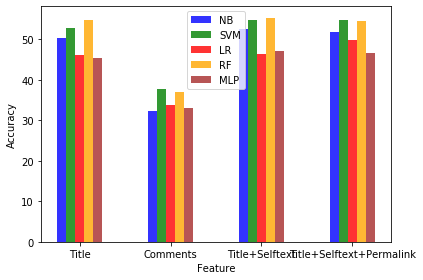

In [59]:
# plotting graph 
import numpy as np
import matplotlib.pyplot as plt
n=4
index=np.arange(n)
fig,ax = plt.subplots()
data=[[50.367707,32.423598,52.459552,51.903905], #accuracies of NB
      [52.733737,37.653211,54.763850,54.894590], #accuracies of SVM
      [46.134989,33.845399,46.314757,49.730348], #accuracies of Logistic Regression
      [54.747507,36.917797,55.368524,54.633109], #accuracies of Random Forest
      [45.448602,33.126327,47.017486,46.690635]] #accuracies of MLP Classifer

bar_width=0.1
opacity=0.8

rec1=plt.bar(index,data[0],bar_width,alpha=opacity,color='blue',label='NB')
rec2=plt.bar(index+bar_width,data[1],bar_width,alpha=opacity,color='green',label='SVM')
rec3=plt.bar(index+bar_width+bar_width,data[2],bar_width,alpha=opacity,color='red',label='LR')
rec4=plt.bar(index+bar_width+bar_width+bar_width,data[3],bar_width,alpha=opacity,color='orange',label='RF')
rec4=plt.bar(index+bar_width+bar_width+bar_width+bar_width,data[4],bar_width,alpha=opacity,color='brown',label='MLP')

plt.xlabel('Feature')
plt.ylabel('Accuracy')
plt.xticks(index+bar_width+bar_width,('Title','Comments','Title+Selftext','Title+Selftext+Permalink'))
plt.legend()

plt.tight_layout()
plt.show()


We conclude that feature (__Title+Selftext__) gives the best accuracy __55.36__ when trained on __Random Forest__ algorithm.

In [74]:
# Saving the model

import joblib
filename = 'model.sav'
joblib.dump(sgd,filename)